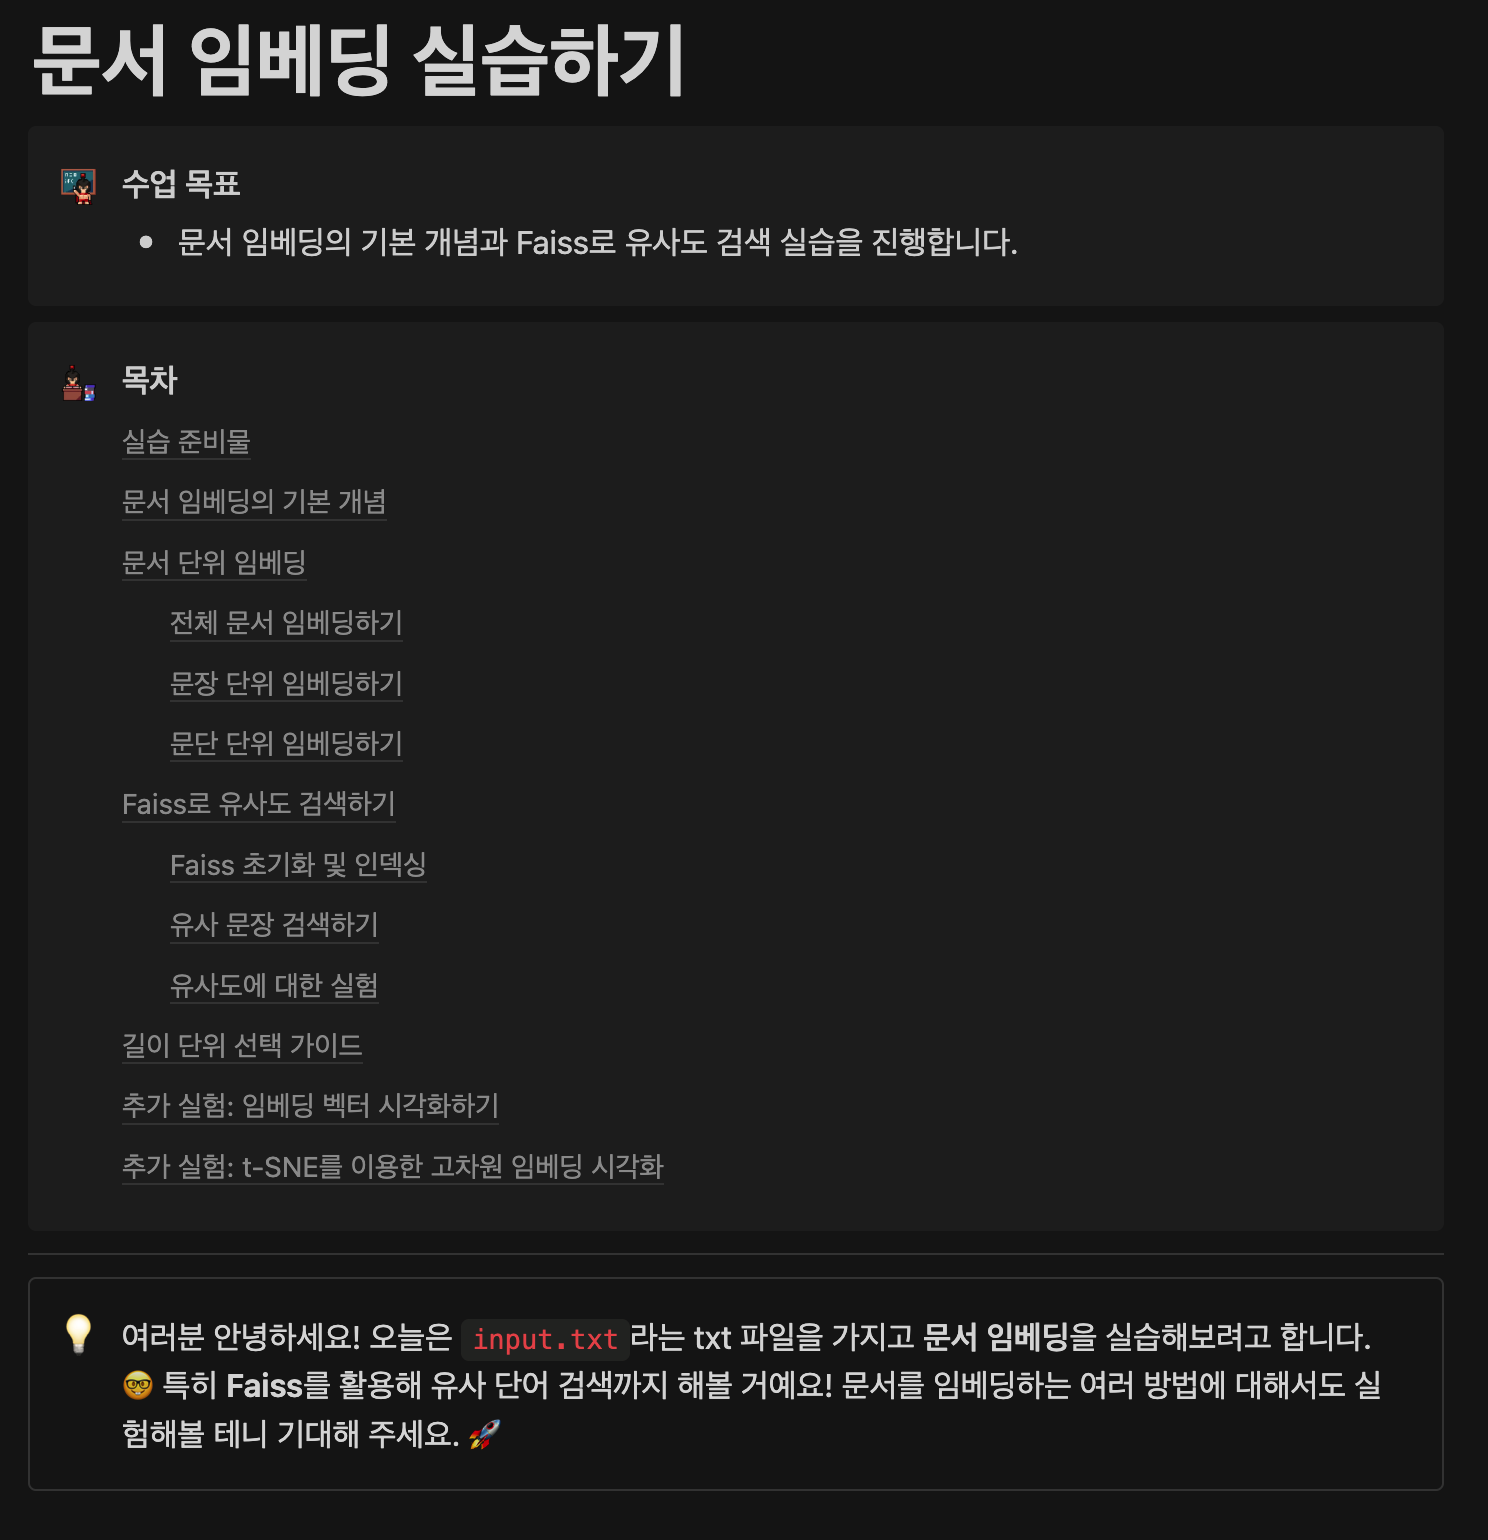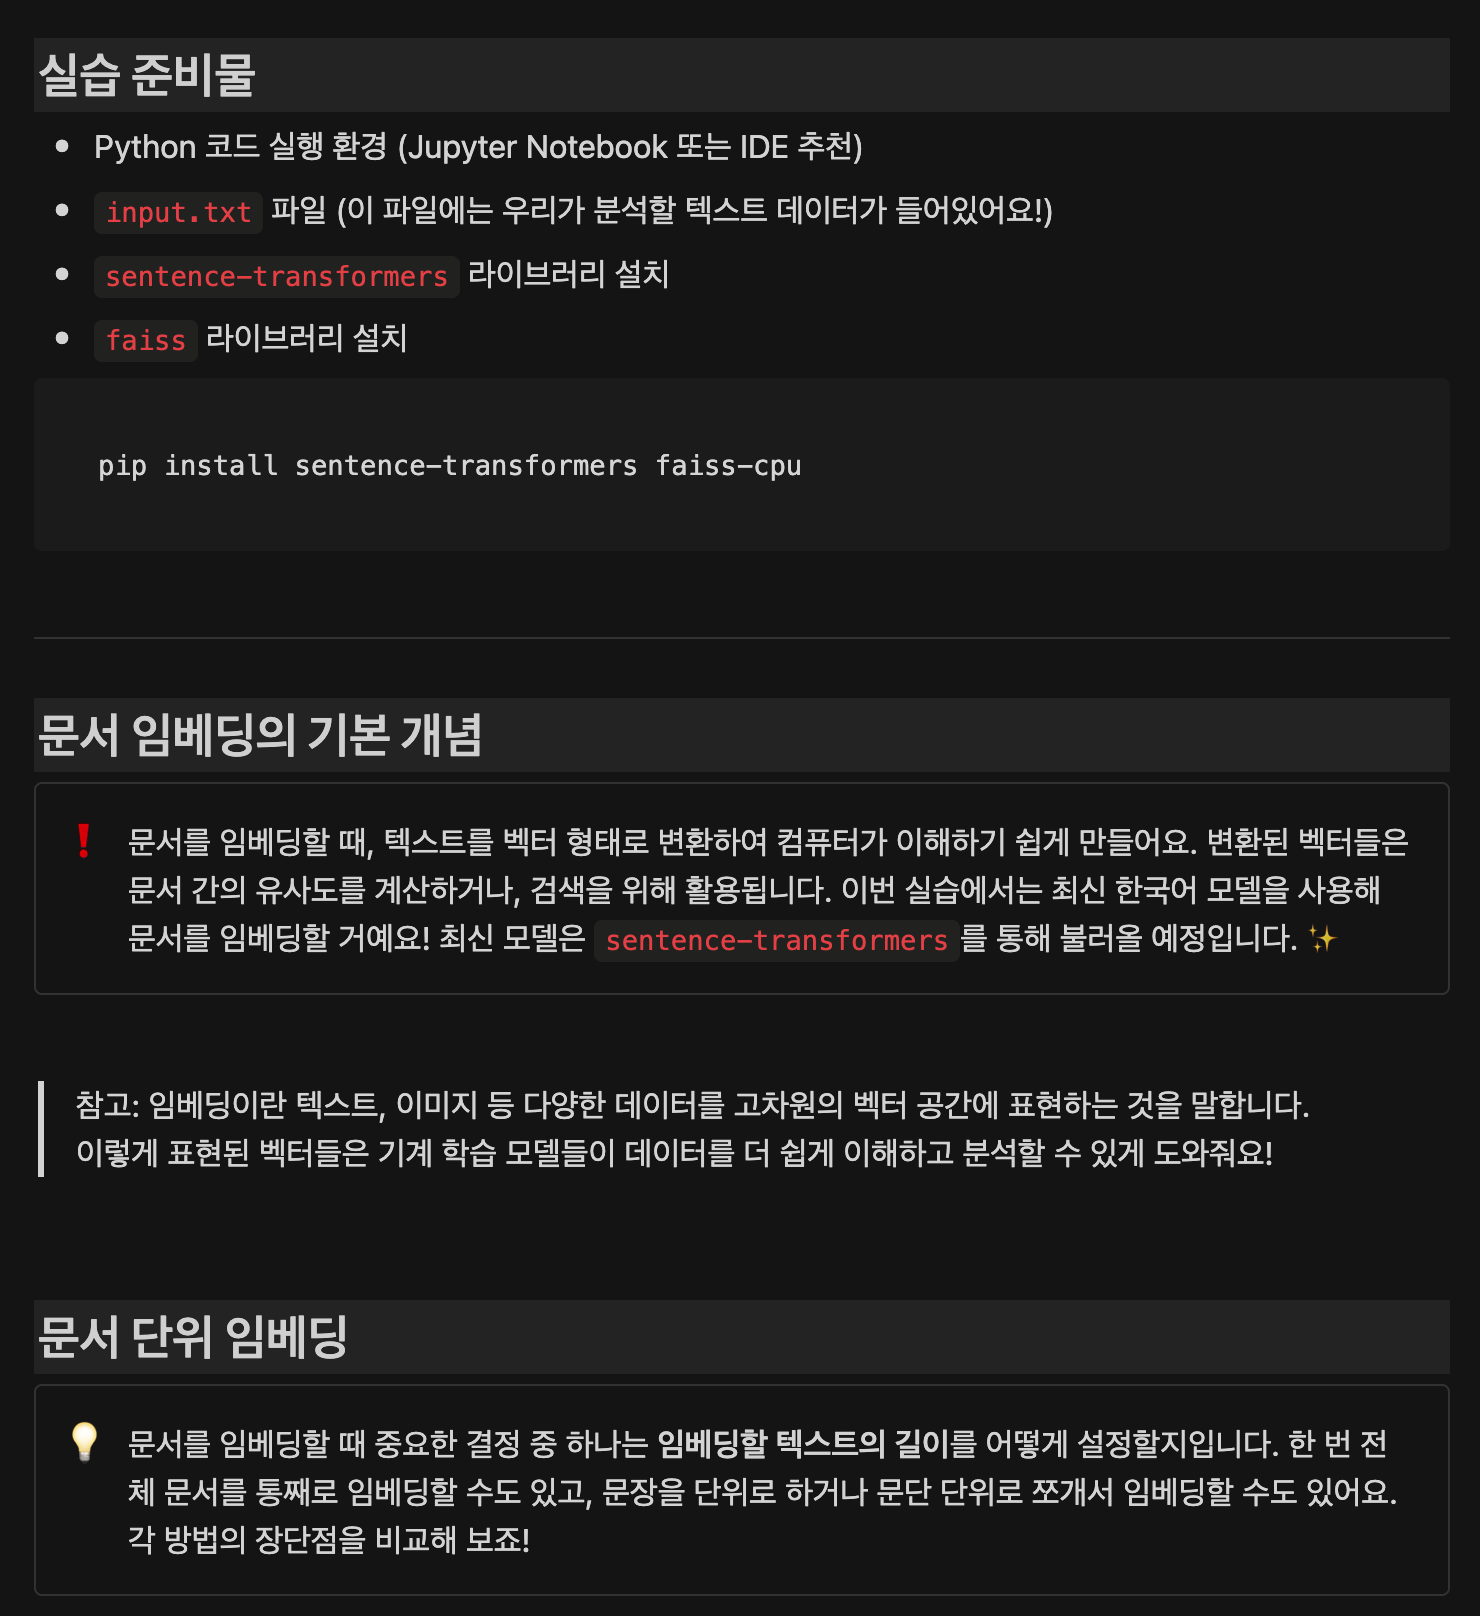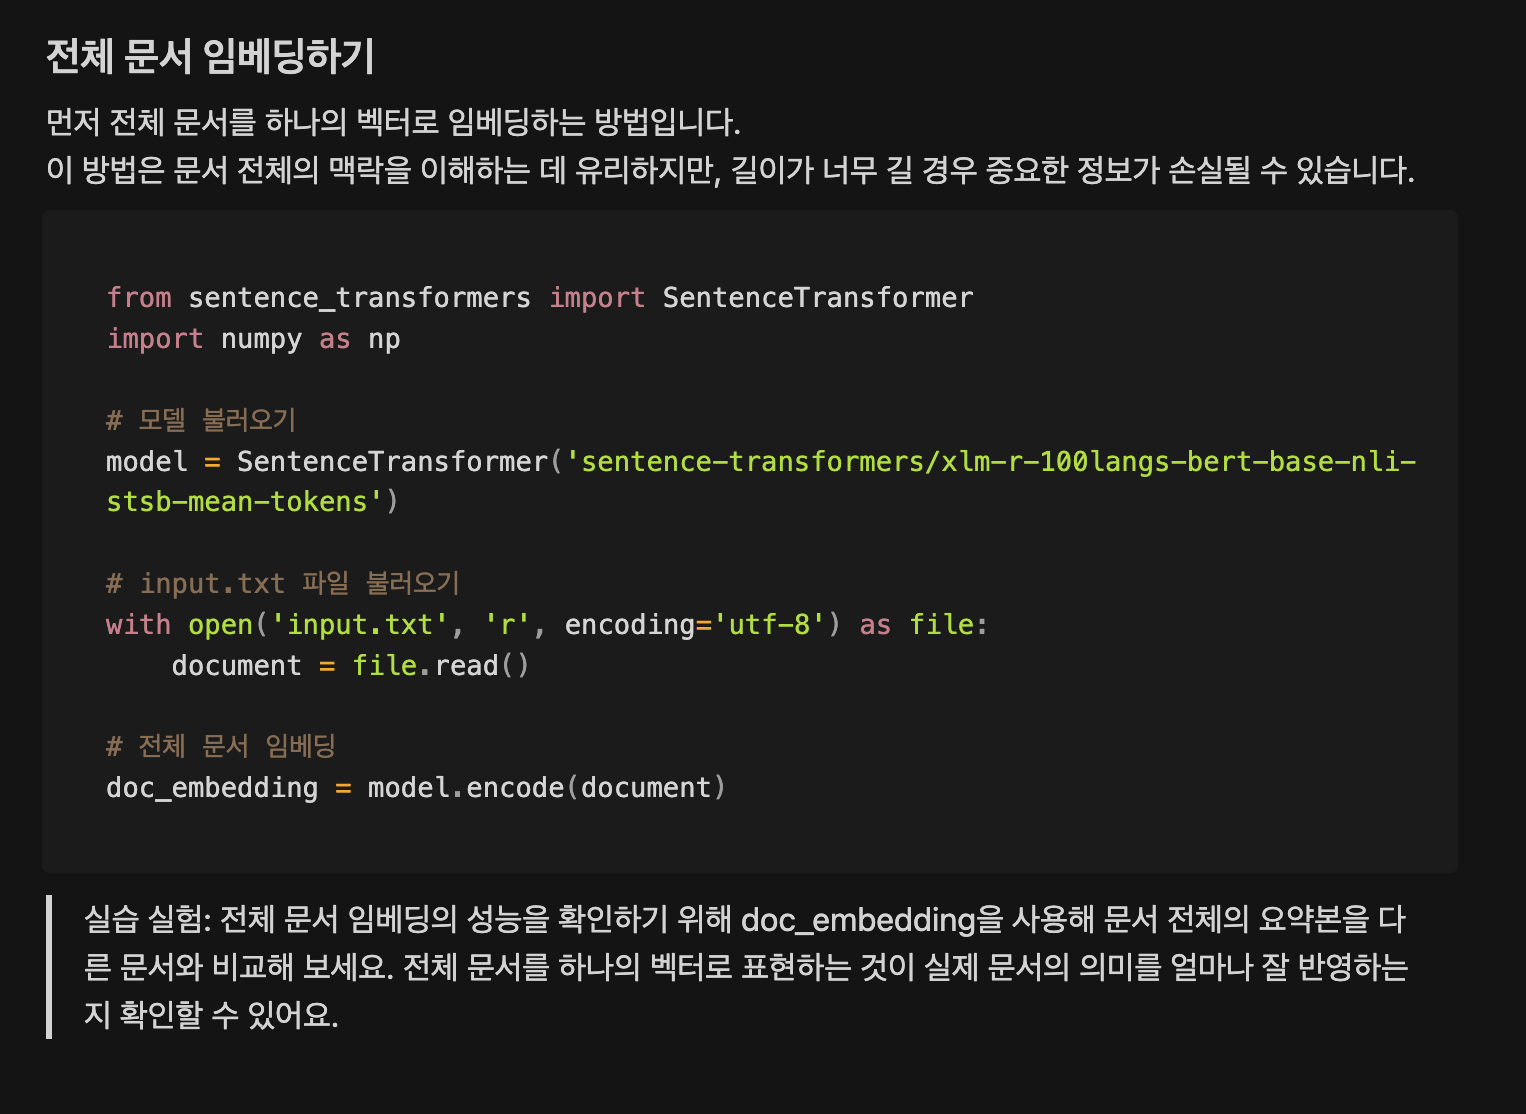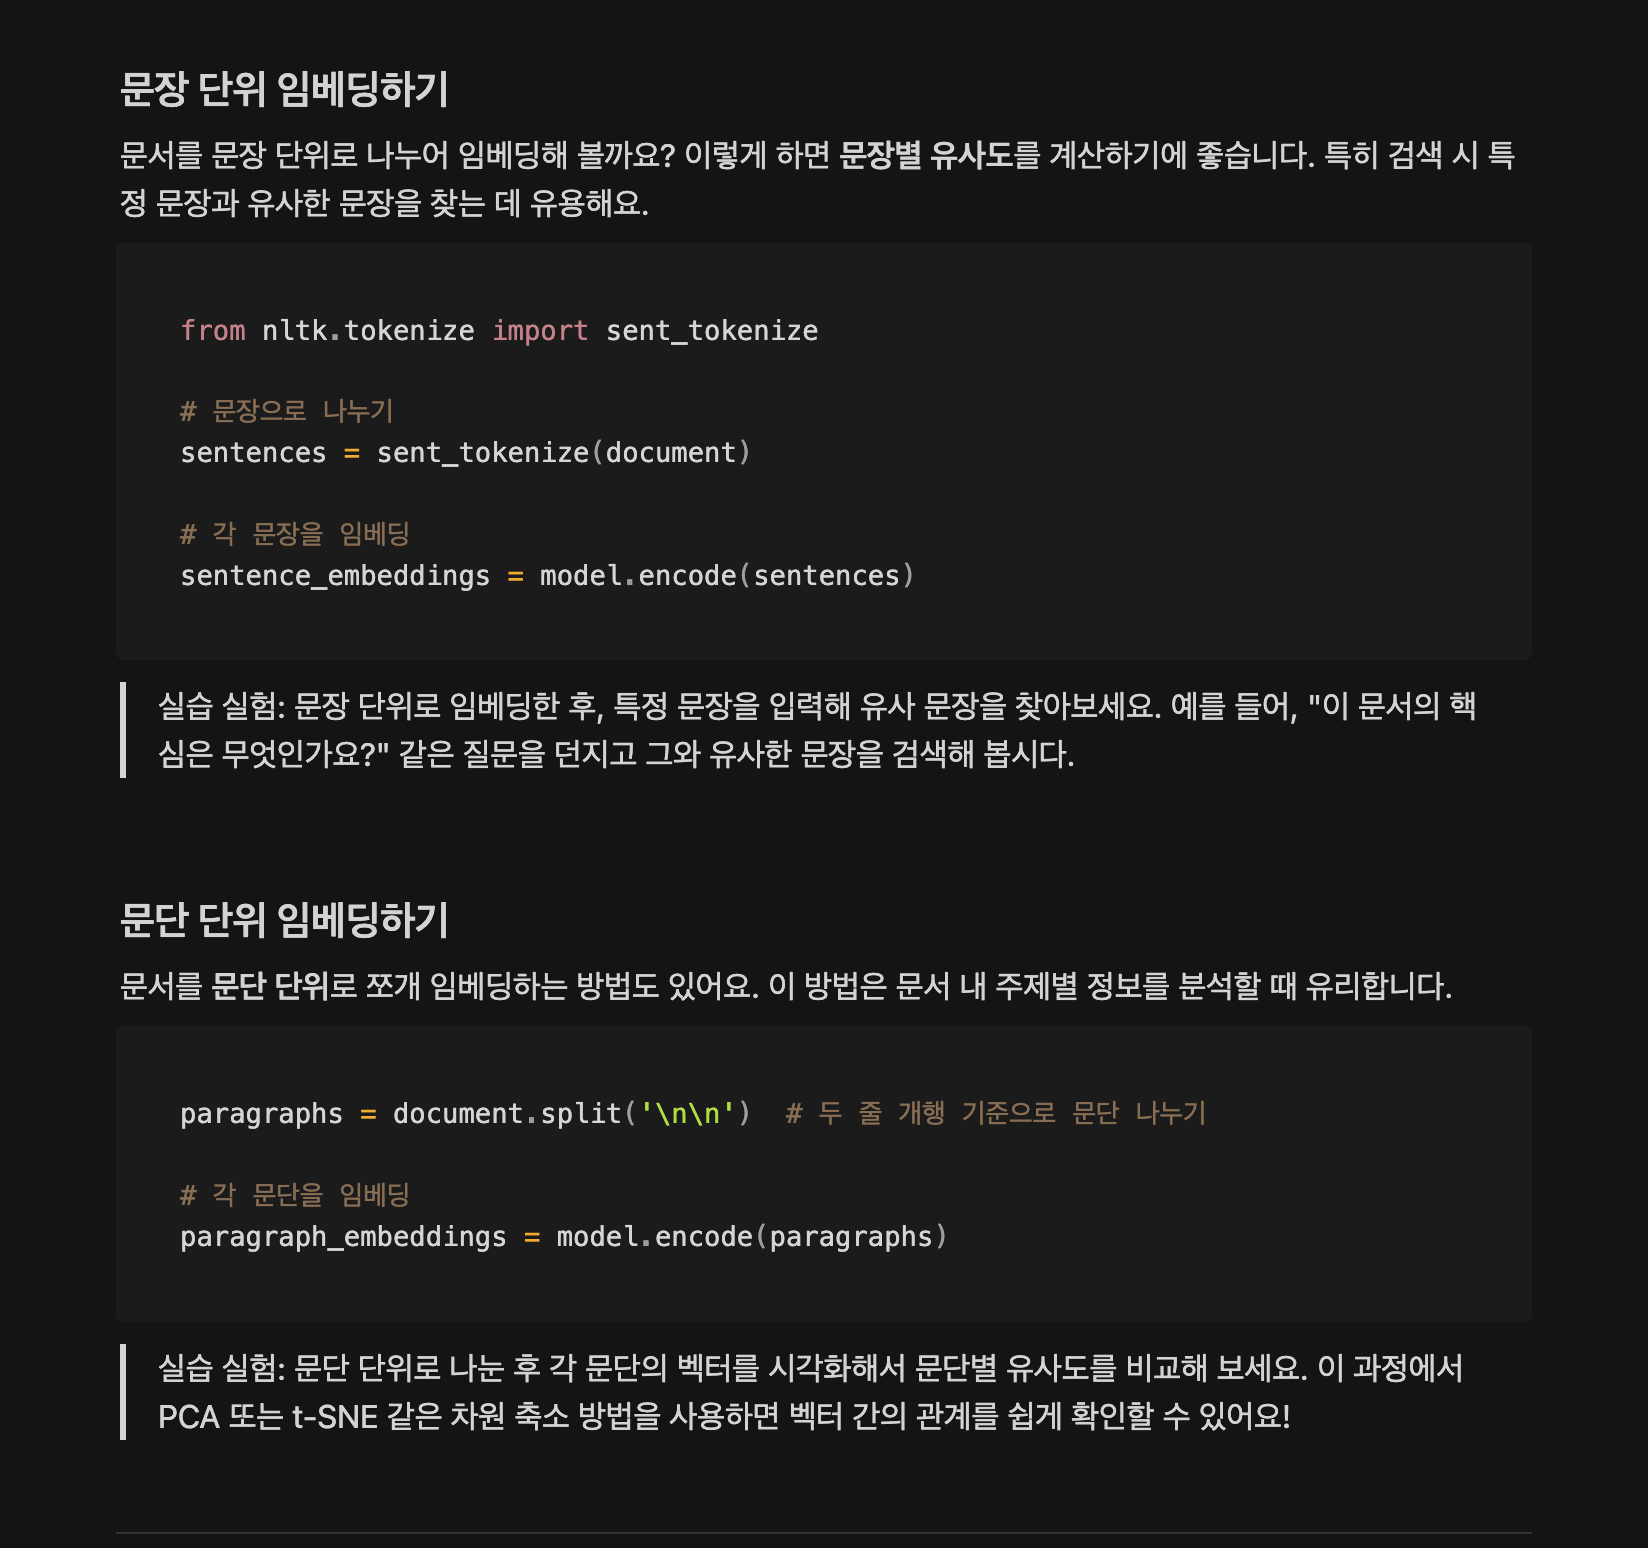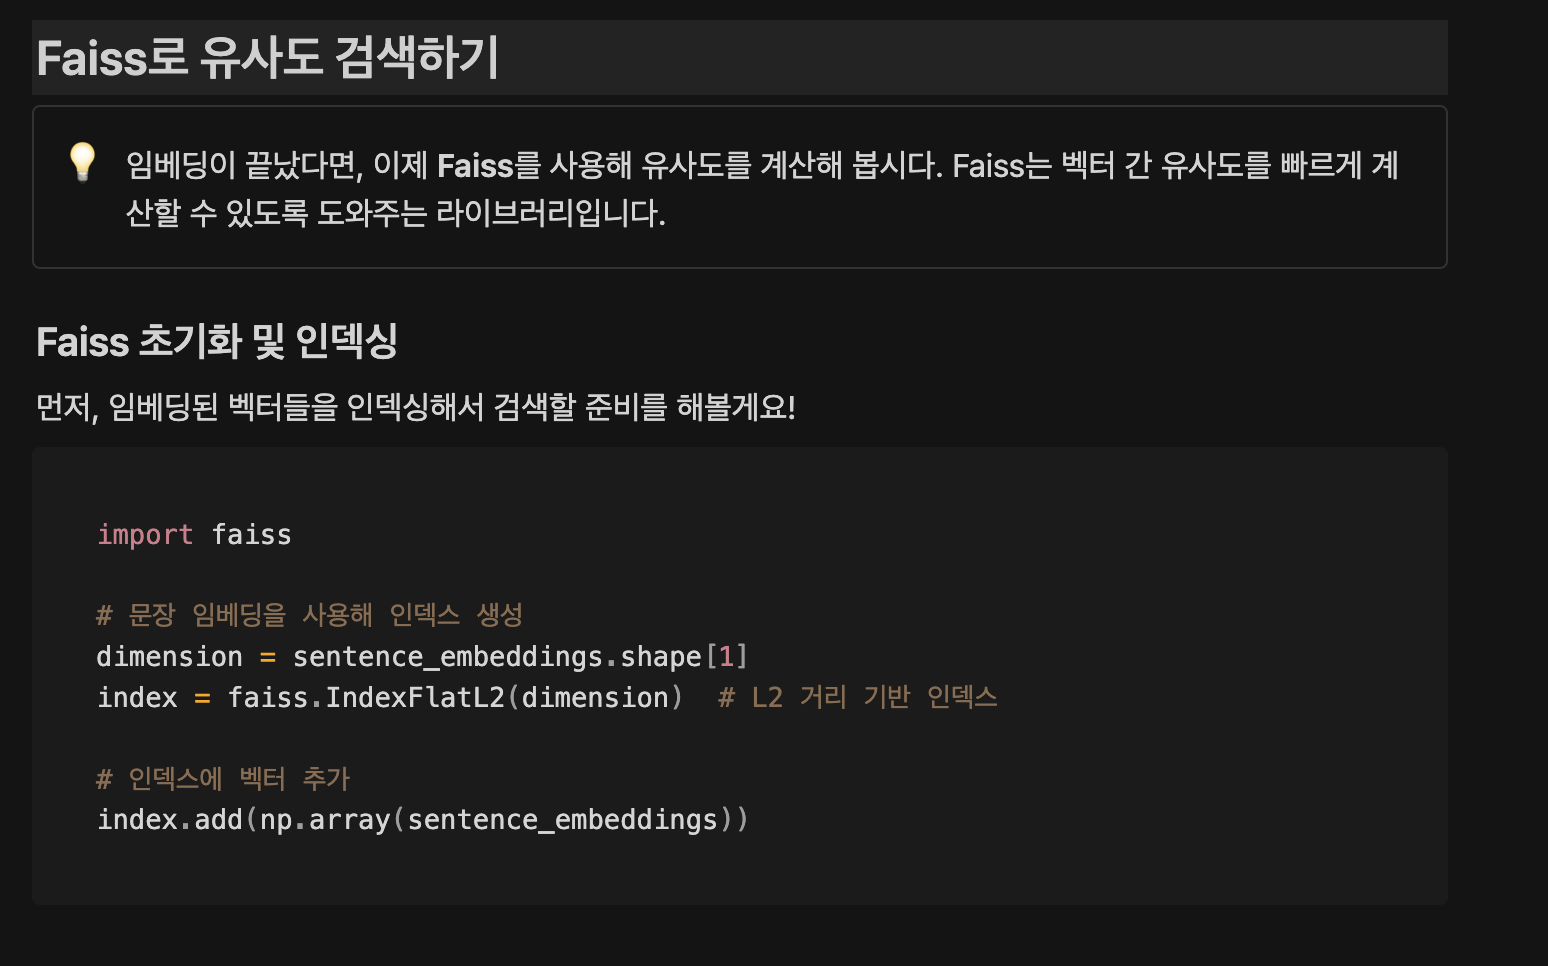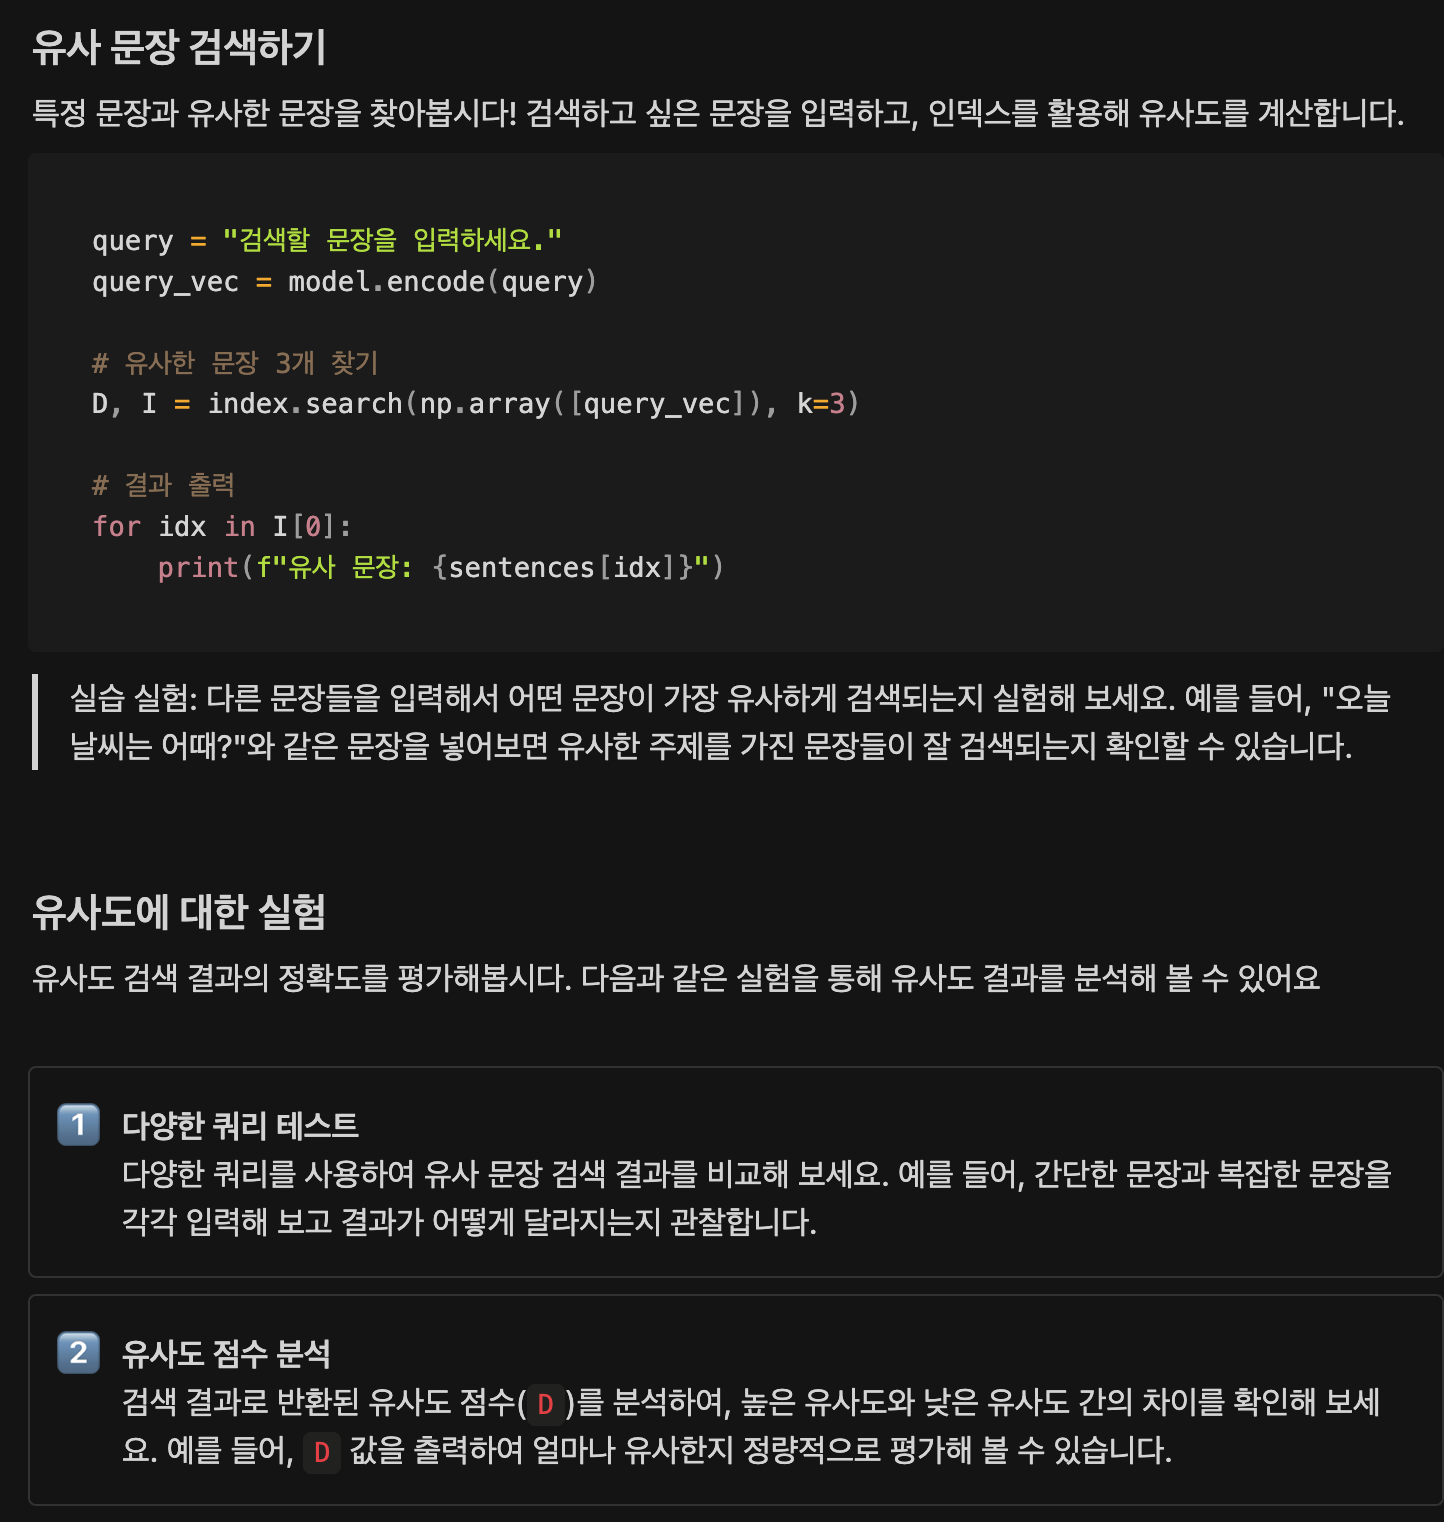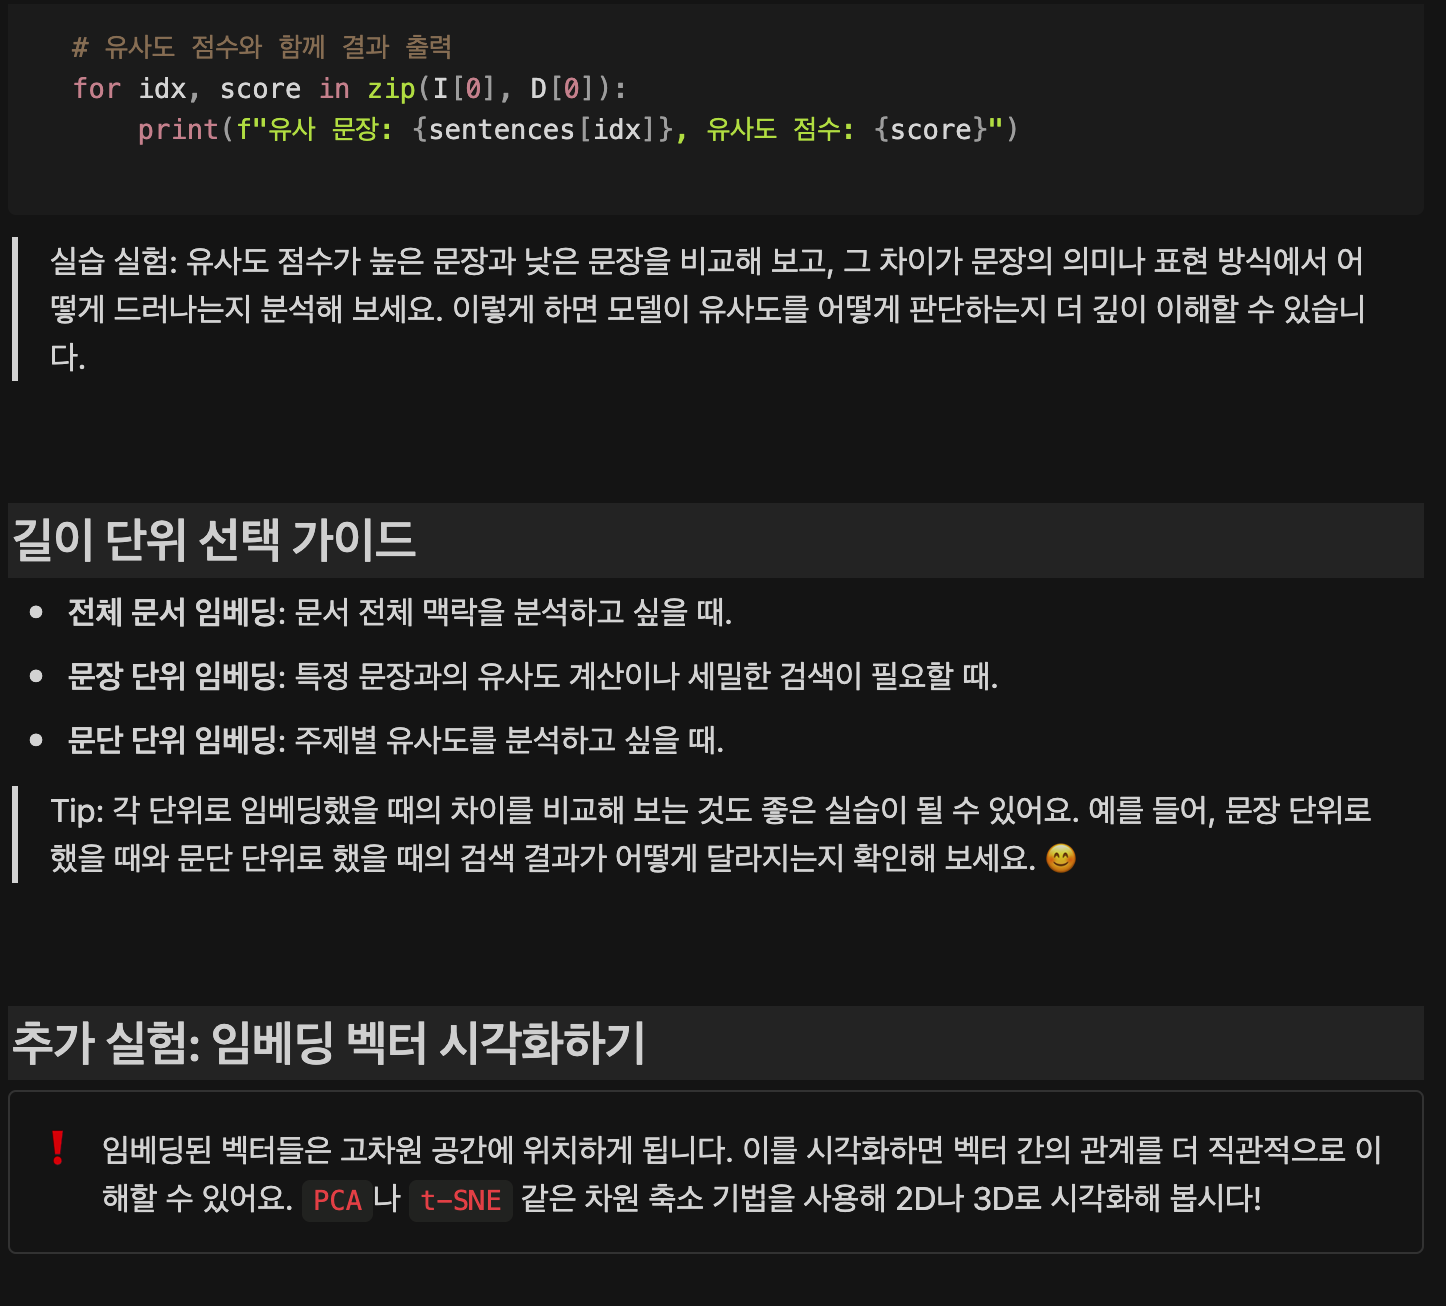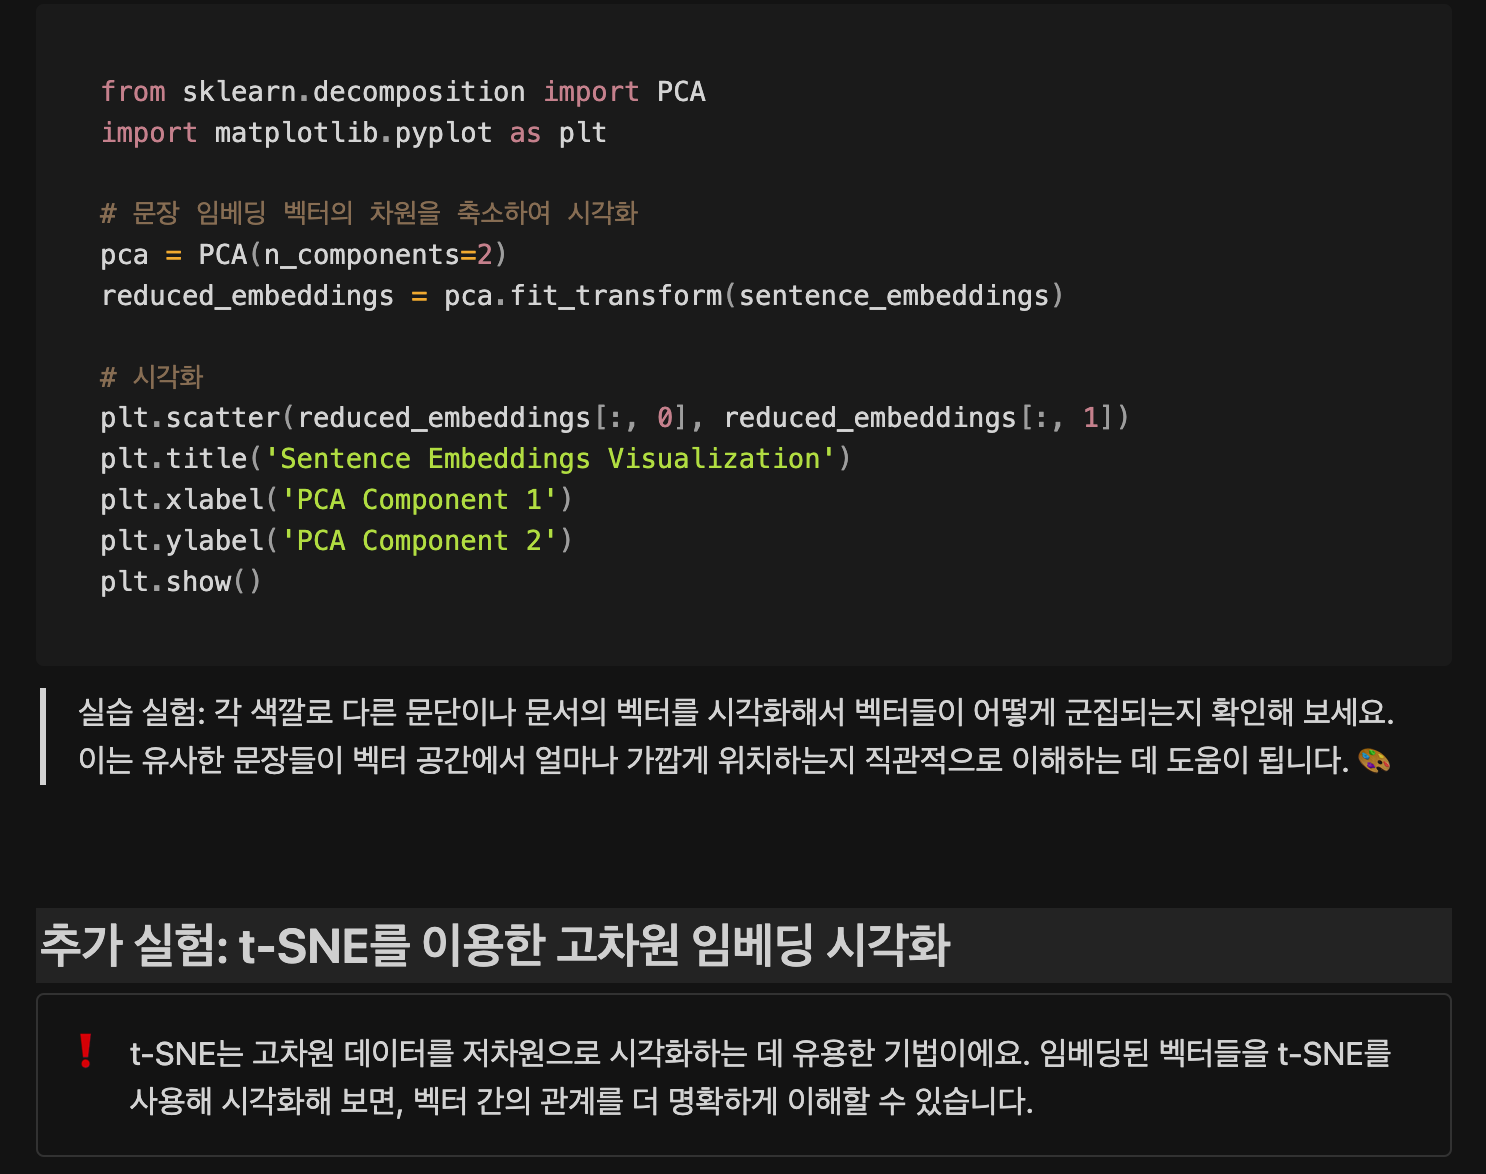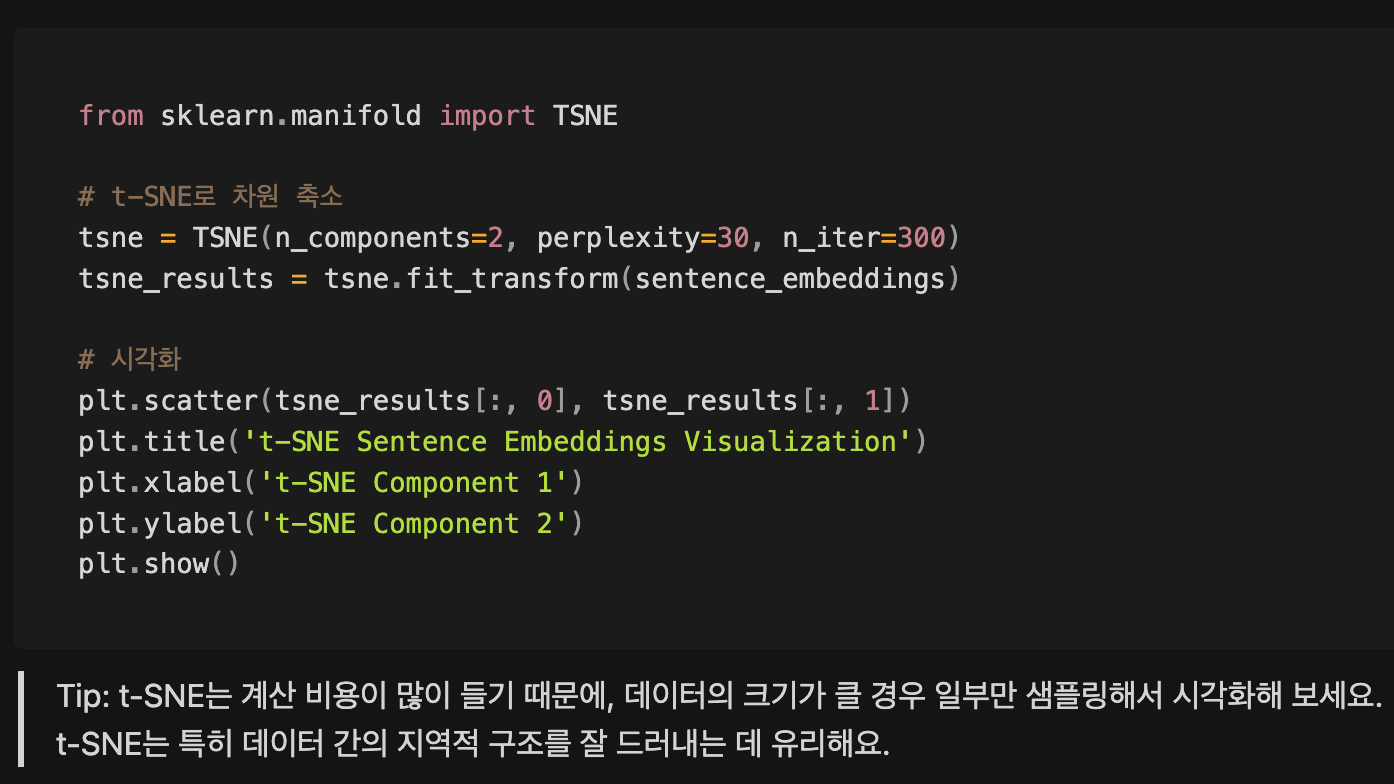

In [3]:
from sentence_transformers import SentenceTransformer
import numpy as np

# 모델 불러오기
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

# input.txt 파일 불러오기
with open('input.txt', 'r', encoding='utf-8') as file:
    document = file.read()

# 전체 문서 임베딩
doc_embedding = model.encode(document)

In [ ]:
from nltk.tokenize import sent_tokenize

# 문장으로 나누기
sentences = sent_tokenize(document)

# 각 문장을 임베딩
sentence_embeddings = model.encode(sentences)

In [ ]:
paragraphs = document.split('\n\n')  # 두 줄 개행 기준으로 문단 나누기

# 각 문단을 임베딩
paragraph_embeddings = model.encode(paragraphs)

In [ ]:
import faiss

# 문장 임베딩을 사용해 인덱스 생성
dimension = sentence_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # L2 거리 기반 인덱스

# 인덱스에 벡터 추가
index.add(np.array(sentence_embeddings))

In [ ]:
query = "검색할 문장을 입력하세요."
query_vec = model.encode(query)

# 유사한 문장 3개 찾기
D, I = index.search(np.array([query_vec]), k=3)

# 결과 출력
for idx in I[0]:
    print(f"유사 문장: {sentences[idx]}")

In [ ]:
# 유사도 점수와 함께 결과 출력
for idx, score in zip(I[0], D[0]):
    print(f"유사 문장: {sentences[idx]}, 유사도 점수: {score}")

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 문장 임베딩 벡터의 차원을 축소하여 시각화
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(sentence_embeddings)

# 시각화
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('Sentence Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

# t-SNE로 차원 축소
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(sentence_embeddings)

# 시각화
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Sentence Embeddings Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()